In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

def load_data(filename, usecols = (), skiprows = 0):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: given as a string.
        
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=skiprows, delimiter=',', usecols= usecols)

In [3]:
movies = load_data('data/movies.csv', usecols = range(2, 20))
movies = np.concatenate((np.array([x for x in range(1, movies.shape[0] + 1)])[:, np.newaxis], movies), axis=1)


In [4]:
user_data = load_data('data/data.csv', skiprows = 1)

In [16]:
# Basic Visualization Arrays
x = movies[:, 0]
y = np.zeros((movies.shape[0], 5))
popularity = np.zeros(10)
pop_ind = np.zeros(10)
ratings = np.zeros(10)
rat_ind = np.zeros(10)
child = np.array([])
fantasy = np.array([])
romance = np.array([])
# ratings_ignore = np.zeros(10)
# rat_ignore = np.zeros(10)

# Convert User data to Rating data by Movie
for user in range(user_data.shape[0]):
    y[int(user_data[user, 1]-1), int(user_data[user, 2]) - 1] += 1

for movie in range(y.shape[0]):
    # Find the weighted average rating for movie to determine top 10 rated movies
    average = (1*y[movie, 0]) + (2*y[movie, 1]) + (3*y[movie, 2]) + (4*y[movie, 3]) + (5*y[movie, 4])
    average /= np.sum(y[movie, :])
    w_average = average * (np.sum(y[movie, :])/np.amax(np.sum(y[:, :], axis = 1)))
    # Generate popularity and rating arrays
    for p in range(popularity.shape[0]):
        if popularity[p] < np.sum(y[movie, :]):
            popularity[p] = np.sum(y[movie, :])
            pop_ind[p] = movie
            break
    for r in range(ratings.shape[0]):
        if ratings[r] < w_average:
            ratings[r] = w_average
            rat_ind[r] = movie
            break
    # Generate genre based arrays
    if movies[movie, 4] == 1 and movie not in child:
        child = np.append(child, movie)
    if movies[movie, 9] == 1 and movie not in fantasy:
        fantasy = np.append(fantasy, movie)
    if movies[movie, 14] == 1 and movie not in romance:
        romance = np.append(romance, movie)
# Sanity check to see that highest rated movies are indeed highest rated
for p in range(popularity.shape[0]):
    v = int(pop_ind[p])
    average = (1*y[v, 0]) + (2*y[v, 1]) + (3*y[v, 2]) + (4*y[v, 3]) + (5*y[v, 4])
    average /= np.sum(y[v, :])
    w_average = average * (np.sum(y[v, :])/np.amax(np.sum(y[:, :], axis = 1)))
    print("Popularity")
    print(popularity[p], w_average)
print()
for r in range(ratings.shape[0]):
    v = int(rat_ind[r])
    average = (1*y[v, 0]) + (2*y[v, 1]) + (3*y[v, 2]) + (4*y[v, 3]) + (5*y[v, 4])
    average /= np.sum(y[v, :])
    w_average = average * (np.sum(y[v, :])/np.amax(np.sum(y[:, :], axis = 1)))
    print("Ratings")
    print(ratings[r], w_average)
#     for r in range(ratings_ignore.shape[0]):
#         if ratings_ignore[r] < average:
#             ratings_ignore[r] = average
#             rat_ignore[r] = movie
#             break


Popularity
583.0 4.3584905660377355
Popularity
509.0 3.3207547169811322
Popularity
507.0 3.485420240137221
Popularity
485.0 2.6260720411663807
Popularity
478.0 2.8216123499142367
Popularity
431.0 2.684391080617496
Popularity
350.0 2.548885077186964
Popularity
344.0 1.955403087478559
Popularity
316.0 1.6929674099485421
Popularity
298.0 2.2830188679245285

Ratings
4.3584905660377355 4.3584905660377355
Ratings
3.620926243567753 3.620926243567753
Ratings
3.485420240137221 3.485420240137221
Ratings
3.3207547169811322 3.3207547169811322
Ratings
3.0171526586620923 3.0171526586620923
Ratings
2.8216123499142367 2.8216123499142367
Ratings
2.684391080617496 2.684391080617496
Ratings
2.548885077186964 2.548885077186964
Ratings
2.2830188679245285 2.2830188679245285
Ratings
1.9725557461406518 1.9725557461406518


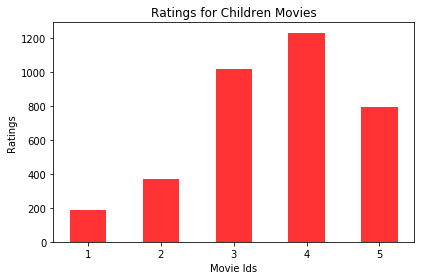

In [17]:
# data to plot 4.1
n_groups = 5
one_rate = 0
two_rate = 0
three_rate = 0
four_rate = 0
five_rate = 0

for p in range(child.shape[0]):
    v = child[p]
    one_rate += y[int(v), 0]
    two_rate += y[int(v), 1]
    three_rate += y[int(v), 2]
    four_rate += y[int(v), 3]
    five_rate += y[int(v), 4]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one_rate, two_rate, three_rate, four_rate, five_rate], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Ratings for Children Movies')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()

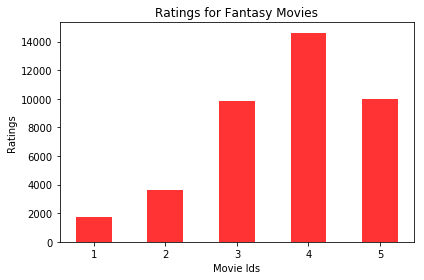

In [18]:
# data to plot 4.2
n_groups = 5
one_rate = 0
two_rate = 0
three_rate = 0
four_rate = 0
five_rate = 0

for p in range(fantasy.shape[0]):
    v = fantasy[p]
    one_rate += y[int(v), 0]
    two_rate += y[int(v), 1]
    three_rate += y[int(v), 2]
    four_rate += y[int(v), 3]
    five_rate += y[int(v), 4]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one_rate, two_rate, three_rate, four_rate, five_rate], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Ratings for Fantasy Movies')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()

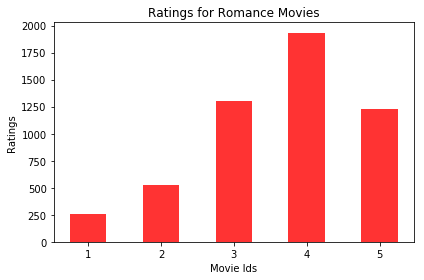

In [22]:
# data to plot 4.3
n_groups = 5
one_rate = 0
two_rate = 0
three_rate = 0
four_rate = 0
five_rate = 0

for p in range(romance.shape[0]):
    v = romance[p]
    one_rate += y[int(v), 0]
    two_rate += y[int(v), 1]
    three_rate += y[int(v), 2]
    four_rate += y[int(v), 3]
    five_rate += y[int(v), 4]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one_rate, two_rate, three_rate, four_rate, five_rate], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Ratings for Romance Movies')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()

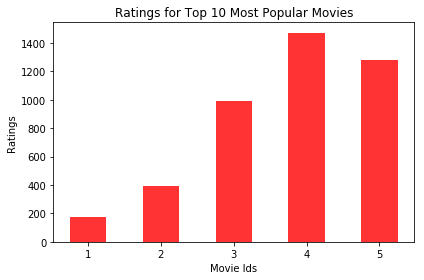

In [23]:
# data to plot 2
n_groups = 5
one_rate = 0
two_rate = 0
three_rate = 0
four_rate = 0
five_rate = 0

for p in range(pop_ind.shape[0]):
    v = pop_ind[p]
    one_rate += y[int(v), 0]
    two_rate += y[int(v), 1]
    three_rate += y[int(v), 2]
    four_rate += y[int(v), 3]
    five_rate += y[int(v), 4]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one_rate, two_rate, three_rate, four_rate, five_rate], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Ratings for Top 10 Most Popular Movies')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()

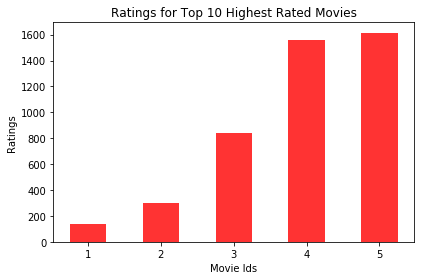

In [24]:
# data to plot 3
n_groups = 5
one_rate = 0
two_rate = 0
three_rate = 0
four_rate = 0
five_rate = 0

for p in range(rat_ind.shape[0]):
    v = rat_ind[p]
    one_rate += y[int(v), 0]
    two_rate += y[int(v), 1]
    three_rate += y[int(v), 2]
    four_rate += y[int(v), 3]
    five_rate += y[int(v), 4]
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one_rate, two_rate, three_rate, four_rate, five_rate], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Ratings for Top 10 Highest Rated Movies')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()

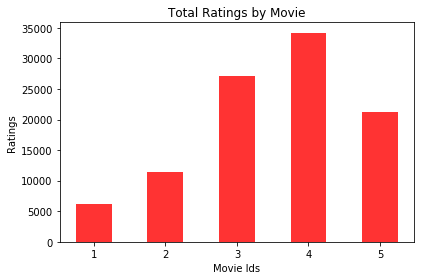

In [25]:
# data to plot 1
n_groups = 5
one = np.sum(y[:, 0])
two = np.sum(y[:, 1])
three = np.sum(y[:, 2])
four = np.sum(y[:, 3])
five = np.sum(y[:, 4])
 
# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.5
opacity = 0.8
 
rects1 = plt.bar(index, [one, two, three, four, five], bar_width,
alpha=opacity,
color='r',
label='Ratings')
 
plt.xlabel('Movie Ids')
plt.ylabel('Ratings')
plt.title('Total Ratings by Movie')
plt.xticks(index, range(1, 6))
 
plt.tight_layout()
plt.show()